In [7]:
library(tidyverse)
library(stringr)
# remotes::install_github("bradleyboehmke/harrypotter")
library(harrypotter)

# Lecture 13: Regular expressions

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand basic regular expressions.
* Use regular expressions to extract data from text.
</div>

These notes correspond to Chapter 16 of your book.


## Regular expressions
Regular expressions (regex, regexps) are a programming language that allows you to describe patterns in strings. They have a steep learning curve but are very powerful for working with text data. In this class we will just focus on the basics of regexps. A good tool for learning regexps is [regex101](https://regex101.com/), which lets you interactively edit and debug your regular expressions.

> Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems. 
>
> — Jamie Zawinski (famous nerd)

The command `str_view` takes a character vector and a regular expression, and show you how they match. 

The most basic regular expression is a plain string. It will match if the other string contains it as a substring.

In [13]:
x = c("apple", "banana", "pear") %>% print
str_view(x, pattern = "an")

[1] "apple"  "banana" "pear"  


[2] │ b<an><an>a

Here `str_view` has matched our regexp (`"an"`) inside of the second string `banana` of the vector `x`.

In [11]:
fruit

[1] "apple"             "apricot"           "avocado"          
 [4] "banana"            "bell pepper"       "bilberry"         
 [7] "blackberry"        "blackcurrant"      "blood orange"     
[10] "blueberry"         "boysenberry"       "breadfruit"       
[13] "canary melon"      "cantaloupe"        "cherimoya"        
[16] "cherry"            "chili pepper"      "clementine"       
[19] "cloudberry"        "coconut"           "cranberry"        
[22] "cucumber"          "currant"           "damson"           
[25] "date"              "dragonfruit"       "durian"           
[28] "eggplant"          "elderberry"        "feijoa"           
[31] "fig"               "goji berry"        "gooseberry"       
[34] "grape"             "grapefruit"        "guava"            
[37] "honeydew"          "huckleberry"       "jackfruit"        
[40] "jambul"            "jujube"            "kiwi fruit"       
[43] "kumquat"           "lemon"             "lime"             
[46] "loquat"            "lychee"            "mandarine"        
[49] "mango"             "mulberry"          "nectarine"        
[52] "nut"               "olive"             "orange"           
[55] "pamelo"            "papaya"            "passionfruit"     
[58] "peach"             "pear"              "persimmon"        
[61] "physalis"          "pineapple"         "plum"             
[64] "pomegranate"       "pomelo"            "purple mangosteen"
[67] "quince"            "raisin"            "rambutan"         
[70] "raspberry"         "redcurrant"        "rock melon"       
[73] "salal berry"       "satsuma"           "star fruit"       
[76] "strawberry"        "tamarillo"         "tangerine"        
[79] "ugli fruit"        "watermelon"

In [12]:
str_view(fruit, 'berry')

 [6] │ bil<berry>
 [7] │ black<berry>
[10] │ blue<berry>
[11] │ boysen<berry>
[19] │ cloud<berry>
[21] │ cran<berry>
[29] │ elder<berry>
[32] │ goji <berry>
[33] │ goose<berry>
[38] │ huckle<berry>
[50] │ mul<berry>
[70] │ rasp<berry>
[73] │ salal <berry>
[76] │ straw<berry>

### Wildcards
Our first non-trivial regular expression will use a wildcard: `.`. Used inside of a regular expression, the period matches any single character:

In [14]:
str_view("else every eele etcetera", "e..e ") 

[1] │ <else >every <eele >etcetera

If we want to "extract" the first match we can use `str_extract()` instead:

In [19]:
str_extract("else every eele etcetera", "e..e ") 

[1] "else "

### Exercise
What's the first word in `ch1` that ends in `ing`?

In [24]:
# extract the first word ending in ing

Suppose I want to answer the question: what are the characters named in Harry Potter? At a first pass, we might guess that a character name is one (or more) capitalized words. How can I match capitalized words?

A capitalized word matches the following *pattern*:

    capitalized word = 
    "<upper case letter><one or more other letters><space>"

A regular expression lets us match this type of pattern using something called a *character class*.

### Character classes
A "character class" is a special pattern that matches a collection of characters. For example, `\d` will match any digit:

In [154]:
str_view(c("number1", "two", "3hree"), "\\d")

HTML widgets cannot be represented in plain text (need html)

Similarly, `\s` will match whitespace (spaces, tabs and newlines):

In [156]:
y = c("spa ce", "hello\tworld", "multi\nline")
writeLines(y)
str_view(y, "\\s")

spa ce
hello	world
multi
line


HTML widgets cannot be represented in plain text (need html)

You can form your own character class using square brackets: `[abc]` will match *one of* `a`, `b`, or `c`. In other words, the 'width' of a character class is one character by default.

In [ ]:
str_view(x, '[be]a')  # Match either 'b' or 'e' followed by a

We can use character classes to match the first capital letter of a capitalized word:

In [ ]:
str_view(c("These", "are", "some Capitalized words"),
         "[ABCDEFGHIJKLMNOPQRSTUVWXYZ]")

We do not need to go to all the trouble of typing each capital letter. We can use the shortcut `[A-Z]` instead.

In [157]:
str_view(c("These", "are", "some Capitalized words"), "[A-Z]")

HTML widgets cannot be represented in plain text (need html)

In [159]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]")

HTML widgets cannot be represented in plain text (need html)

So far we are matching just single characters. Now I want to expand the match to include the whole word. To do so I will use the special character class called `\w`, which matches a "word character":

In [160]:
str_view_all("Here is a sentence", "\\w")

HTML widgets cannot be represented in plain text (need html)

Note the additional level of escaping needed here: "\\w" gets parsed by R into the string `\w`:

In [ ]:
writeLines("\\w")

The `\w` is then parsed again by the regular expression.

The string "\w" is not valid in R, because there is no escape code "\w":

```
> "\w"
Error: '\w' is an unrecognized escape in character string starting ""\w"
Traceback:
```

Using `\w`, we can expand our regexp to match capitalized words containing two letters:

In [163]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w")

HTML widgets cannot be represented in plain text (need html)

Or two:

In [165]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w\\w")
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w\\w\\w")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Now we have run into an issue: by adding more `\w`s, we have excluded the all capitalized words with three letters. But we want to match capitalized words of any length. To do this, we will introduce a *quantifier*. The `*` character says, "match zero or more of the thing that came immediately before me":

In [ ]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w*")
str_extract_all(str_sub(ch1, 1, 50), "[A-Z]\\w*")

A closely related quantifier is `+`, which matches *one* or more of the preceding thing:

In [171]:
str_extract_all(ch1, "[A-Z]\\w\\w\\w\\w*")[[1]] %>% unique
# note the difference with:
# str_view(str_sub(ch1, 1, 50), "[A-Z]\\w\\w\\w*")

[1] "LIVED"       "Dursley"     "Privet"      "Drive"       "They"       
  [6] "Grunnings"   "Dursleys"    "Dudley"      "Potters"     "Potter"     
 [11] "Dursleyish"  "This"        "When"        "Tuesday"     "None"       
 [16] "Little"      "There"       "What"        "People"      "Most"       
 [21] "Harry"       "Fear"        "Come"        "Harvey"      "Harold"     
 [26] "Sorry"       "Rejoice"     "Know"        "Even"        "Muggles"    
 [31] "Muggle"      "Shoo"        "Trying"      "Next"        "Door"       
 [36] "Although"    "Experts"     "McGuffin"    "Going"       "Well"       
 [41] "Viewers"     "Kent"        "Yorkshire"   "Dundee"      "Perhaps"    
 [46] "Bonfire"     "Night"       "Shooting"    "Britain"     "Owls"       
 [51] "Mysterious"  "Petunia"     "After"       "Funny"       "Instead"    
 [56] "Their"       "Howard"      "Nasty"       "While"       "Could"      
 [61] "Nothing"     "Albus"       "Dumbledore"  "Twelve"      "Outer"      
 [66] "Fancy"       "Professor"   "McGonagall"  "Flocks"      "Dedalus"    
 [71] "Diggle"      "YouKnow"     "Would"       "Voldemort"   "Everyone"   
 [76] "Only"        "Madam"       "Pomfrey"     "About"       "Godric"     
 [81] "Hollow"      "Lily"        "James"       "That"        "Hagrid"     
 [86] "Really"      "These"       "Exactly"     "Famous"      "CarA"       
 [91] "Borrowed"    "Young"       "Sirius"      "Black"       "Bristol"    
 [96] "Inside"      "Under"       "Couldn"      "Scars"       "London"     
[101] "Underground" "Then"        "Shhh"        "Yeah"        "Wiping"     
[106] "Good"

The most general form of quantifier is `{<min>,<max>}`:

In [178]:
str_extract_all(ch1, "[A-Z]\\w{5,}")[[1]] %>% unique

[1] "Dursley"     "Privet"      "Grunnings"   "Dursleys"    "Dudley"     
 [6] "Potters"     "Potter"      "Dursleyish"  "Tuesday"     "Little"     
[11] "People"      "Harvey"      "Harold"      "Rejoice"     "Muggles"    
[16] "Muggle"      "Trying"      "Although"    "Experts"     "McGuffin"   
[21] "Viewers"     "Yorkshire"   "Dundee"      "Perhaps"     "Bonfire"    
[26] "Shooting"    "Britain"     "Mysterious"  "Petunia"     "Instead"    
[31] "Howard"      "Nothing"     "Dumbledore"  "Twelve"      "Professor"  
[36] "McGonagall"  "Flocks"      "Dedalus"     "Diggle"      "YouKnow"    
[41] "Voldemort"   "Everyone"    "Pomfrey"     "Godric"      "Hollow"     
[46] "Hagrid"      "Really"      "Exactly"     "Famous"      "Borrowed"   
[51] "Sirius"      "Bristol"     "Inside"      "Couldn"      "London"     
[56] "Underground" "Wiping"

### Exercise
Find all capitalized words in chapter 1 that have at least 6 characters.

In [25]:
# all cap words that have at least six characters

### Word boundaries
The pattern we used above for finding capital words is not quite accurate, since it assumes that a space comes after each word. Also, it matches capital letters occurring in the middle of a word.

In [179]:
str_view_all(c("Dick vanDyke was a TV host", "Roger Federer"),
             "[A-Z]\\w* ")

HTML widgets cannot be represented in plain text (need html)

A better pattern would be something like:

    capitalized word = 
        <word boundary><upper case letter><zero or more other letters><word boundary>
    
Regular expressions give us the ability to do this using the special character `\b`. This matches the boundary of a word:

In [180]:
str_view_all("Here is a sentence", "\\b")

HTML widgets cannot be represented in plain text (need html)

Let's build a regex that counts the words in a sentence. First, we need a pattern for what a word looks like:

    <word boundary><one or more letters><word boundary>

### Exercise
Translate this pattern into a regexp. Test it out on your favorite sentence:

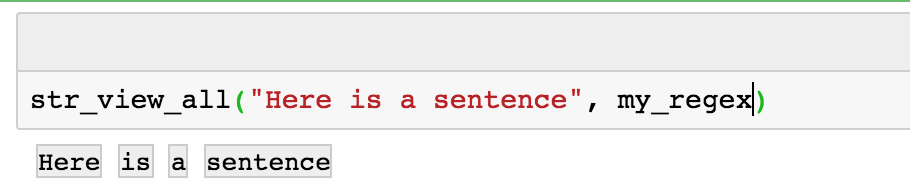

In [188]:
str_count(ch1, "\\b\\w+\\b")

[1] 4778

The `str_count()` function counts the number of matches:

In [181]:
str_view_all("Here is a sentence", "sentence")
str_count("Here is a sentence", "sentence")
str_count(ch1, ".")
str_length(ch1)

HTML widgets cannot be represented in plain text (need html)

[1] 1

[1] 25928

[1] 25928

### Exercise
**Beginner** How many words are in Chapter 1?

**Advanced** How many words ending in `ing` are in Chapter 1?

## Grouping
In the previous exercise we found that "Professor" is one of the most common capitalized words. Is there a character named Professor, or is it just a title? Now let us try to match one or more capitalized words in a row. We can accomplish this by creating a *group*, and then applying a quantifier to it. 

To create a group, I surround a part of my regexp with parentheses:

In [ ]:
str_view("this will be grouped", "[a-z]+ ?")
str_view("this will be grouped", "([a-z]+ ?)")

The parentheses do not change the regular expression (but they are doing something else, which we will discuss in the next lecture.) But now I can apply a quantifier to the whole group:

In [ ]:
str_view("this will be grouped", "([a-z]+ ?)+")

(Aside: This is sort of the "Ah-ha!" moment when it comes to learning regular expressions. Once you understand that you can do things like this, you begin to unlock their power.)

In [ ]:
str_extract_all(ch1, "([A-Z]\\w{4,} )+", 
                simplify=T) %>% fct_count %>% 
                top_n(10)

Earlier we looked at quotations. The first quotation in chapter 1 is:

In [ ]:
str_sub(ch1, 2150, 2163)

How can we find other quotes? The pattern for a quote is a quotation mark, followed by any number of things that are not a quotation mark, followed by another quotation mark:

    <quotation mark><anything that is not a quotation mark><quotation mark>


To match this, we will use a *negation*. A negation is a character class that begins with the character "^". It matches anything that in *not* inside the character class:

In [ ]:
str_view_all("match doesn't match", "[^aeiou]+")

To match a quotation, we'll input the pattern that we specified above:

In [ ]:
str_view_all('"Here is a quotation", said the professor. "And here is another."',
             '"[^"]+"')

### Exercise
**Beginner** How many quotations are there in ch1?

**Advanced** What is the longest quotation in the whole book?

In [118]:
# Your code here

## Backreferences
Parentheses define groups that can be referred to later in the match as `\1`, `\2` etc. This is called a backreference. For example:

    (.)\1

will match the same character repeated twice in a row:

In [26]:
"eel"  %>% str_view("(.)\\1", match = T)

[1] │ <ee>l

### Exercise
What does this regular expression match match?

```
"(..).*\\1"
```





In [74]:
# Your code here

In [ ]:
### Exercise

**Beginner** Write a regexp that matches words ending in the same vowel repeated twice. (For example, "levee".)

**Advanced** Write a regexp that matches two *or more* repeated characters. It should work as follows:

```
> str_extract(c("breeeeze", "hahahaaaaaaaaa"), 
              my_regexp)
[1] 'eeee' 'aaaaaaaaa'
```

In [ ]:
## Alternatives
An *alternative* means *match this or that*. Alternative patterns can be matched using the syntax `(this|that)`.

In [62]:
color_re = "colo(r|ur)"
x <- c("color", "red colour", "coloured glass", "chair", 
       "colored chair")
str_view(x, color_re)

HTML widgets cannot be represented in plain text (need html)

In [ ]:
### Example
Suppose we want to match telephone numbers of the form:

* xxx-xxx-xxxx
* (xxx) xxx-xxxx

In [64]:
# complicated because of all the double backslashes
phone_re = "(\\d\\d\\d-|\\(\\d\\d\\d\\) )\\d\\d\\d-\\d\\d\\d\\d" 
writeLines(phone_re)

(\d\d\d-|\(\d\d\d\) )\d\d\d-\d\d\d\d


In [65]:
n <- c("123-456-7890", "(123) 456-7890", "1234567890", "+1-123-456-7890")
str_view(n, phone_re)

HTML widgets cannot be represented in plain text (need html)

In [ ]:
### Challenge Question
This command loads the text of Hamlet:

In [59]:
hamlet <- readLines(url("http://erdani.com/tdpl/hamlet.txt"))
writeLines(hamlet[1:15])


1604


THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.


In [ ]:
### Exercise

Shakespeare used a lot of [poetic contractions](https://en.wikipedia.org/wiki/Poetic_contraction): `'tis`, `'twas`, `o'er`, etc.

**Beginner** Write a regexp that matches all such contractions

**Advanced** Print a frequency table of the top 10 most common.

In [67]:
str_extract_all(
        str_to_lower(hamlet), "[a-z]*'[a-z]+") %>% unlist %>% 
    print

   [1] "hamlet's"       "who's"          "'tis"           "'tis"          
   [5] "reliev'd"       "appear'd"       "'tis"           "'twill"        
   [9] "that's"         "that's"         "usurp'st"       "'tis"          
  [13] "on't"           "frown'd"        "'tis"           "is't"          
  [17] "appear'd"       "prick'd"        "dar'd"          "esteem'd"      
  [21] "seal'd"         "seiz'd"         "return'd"       "design'd"      
  [25] "shark'd"        "in't"           "e'en"           "mind's"        
  [29] "neptune's"      "i'll"           "country's"      "'tis"          
  [33] "'tis"           "'tis"           "'gainst"        "saviour's"     
  [37] "hallow'd"       "o'er"           "let's"          "do't"          
  [41] "brother's"      "'twere"         "barr'd"         "brother's"     
  [45] "fail'd"         "nephew's"       "what's"         "is't"          
  [49] "father's"       "seal'd"         "know'st"        "'tis"          
  [53] "'seems"         "

In [ ]:
## Anchors
Sometimes we want a match to occur at a particular position in the string. For example, "all words which start with b". For this we have the special anchor characters: `^` and `$`. The caret `^` matches the beginning of a string. The `$` matches the end.

In [76]:
x <- c('apple', 'banana', 'pear')
str_view(x, '^b')
str_view(x, 'r$')

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

In [ ]:
### Exercise
What does this regexp do?
```
re = "^(.).*\\1$" 
```

In [ ]:
### `str_extract`
`str_extract(v, re)` extracts substring matched by `re` from each element of `v`. Another way to think of this is as returning the portion of the string which is highlighted by `str_view`:

In [91]:
q = 'Research is formalized curiosity. It is poking and prying with a purpose.'
# re to match capitalized words
# re = NA
# str_view(q, re)
# str_extract(q, re)

In [ ]:
Analogous to `str_view_all` we have `str_extract_all`:

In [92]:
str_view_all(q, re)
str_extract_all(q, re)

HTML widgets cannot be represented in plain text (need html)

[[1]]
 [1] "Research"   "is"         "formalized" "curiosity"  "It"        
 [6] "is"         "poking"     "and"        "prying"     "with"      
[11] "a"          "purpose"

In [ ]:
### `str_match`
`str_match(v, re)` will create a matrix out of the grouped matches in `re`. The first column has the whole match, and additional columns are added for each character group. If the pattern does not match, you will get `NA`s.

In [47]:
head(str_match(words, '^(.).*(.)$'))

NA,NA,NA
able,a,e
about,a,t
absolute,a,e
accept,a,t
account,a,t


In [ ]:
### `str_replace`
`str_replace(v, re, rep)` will replace each match of `re` in `v` with `rep`. The most basic usage is as a sort of find and replace:

In [50]:
str_replace('Give me liberty or give me death', '\\w+$', 'pizza')

[1] "Give me liberty or give me pizza"

In [ ]:
A very useful feature of regexp replacements is the ability to use backreferences:

In [ ]:
# Your code here